# Task
Perform a linear regression analysis on the '4) House_prediction.csv' dataset to predict house prices. This involves loading the data, preparing it for regression (including handling missing values), splitting it into training and testing sets, training a linear regression model, evaluating its performance with R-squared and Mean Squared Error, interpreting the model coefficients, and visualizing the actual vs. predicted values. Finally, summarize the key findings from the analysis.

## Load Dataset

Load the House_prediction.csv' dataset into a pandas DataFrame.


In [1]:
import pandas as pd

df = pd.read_csv('/content/4) House_prediction.csv')
df.head()

,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
0,0.02731 0.00 7.070 0 0.4690 6.4210 78...
1,0.02729 0.00 7.070 0 0.4690 7.1850 61...
2,0.03237 0.00 2.180 0 0.4580 6.9980 45...
3,0.06905 0.00 2.180 0 0.4580 7.1470 54...
4,0.02985 0.00 2.180 0 0.4580 6.4300 58...


The initial load of the dataset interpreted the first row as column headers, but it appears these are actually part of the data. To address this, I will reload the dataset explicitly without a header and then assign meaningful column names to ensure proper data interpretation for the regression analysis.

In [3]:
column_names = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
    'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'
]
df = pd.read_csv('/content/4) House_prediction.csv', header=None, delim_whitespace=True)
df.columns = column_names
df.head()

/tmp/ipython-input-3113783650.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('/content/4) House_prediction.csv', header=None, delim_whitespace=True)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
column_names = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
    'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'
]
df = pd.read_csv('/content/4) House_prediction.csv', header=None, sep='\s+')
df.columns = column_names
df.head()

<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-1419967696.py:5: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv('/content/4) House_prediction.csv', header=None, sep='\s+')


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
column_names = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
    'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'
]
df = pd.read_csv('/content/4) House_prediction.csv', header=None, sep=r'\s+')
df.columns = column_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Prepare Data for Regression

Identify the features (independent variables) and the target variable (dependent variable) from the dataset. Handle any missing values if present.


In [6]:
X = df.drop('MEDV', axis=1)
y = df['MEDV']

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)

print("\nMissing values in DataFrame:")
print(df.isnull().sum())

Features (X) shape: (506, 13)
Target (y) shape: (506,)

Missing values in DataFrame:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


## Split Data

Split the preprocessed dataset into training and testing sets to evaluate the model's performance on unseen data. A common split is 80% for training and 20% for testing.


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (404, 13)
X_test shape: (102, 13)
y_train shape: (404,)
y_test shape: (102,)


## Train Linear Regression Model

Fit a linear regression model using scikit-learn on the training data.


In [8]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

print("Linear Regression model trained successfully.")

Linear Regression model trained successfully.


## Evaluate and Interpret Model

Evaluate the trained model's performance on the test set using metrics like R-squared and Mean Squared Error (MSE). Interpret the coefficients of the linear regression model to understand the impact of each feature on the target variable. Provide these metrics and interpretations clearly.


In [9]:
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# 1. Make predictions on the test set
y_pred = model.predict(X_test)

# 2. Calculate and print Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

# 3. Calculate and print R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2): {r2:.2f}")

# 4. Print the intercept of the model
print(f"\nModel Intercept: {model.intercept_:.2f}")

# 5. Print the coefficients of the model and combine with feature names
print("\nModel Coefficients:")
coefficients_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_
})
print(coefficients_df)

Mean Squared Error (MSE): 24.29
R-squared (R2): 0.67

Model Intercept: 30.25

Model Coefficients:
    Feature  Coefficient
0      CRIM    -0.113056
1        ZN     0.030110
2     INDUS     0.040381
3      CHAS     2.784438
4       NOX   -17.202633
5        RM     4.438835
6       AGE    -0.006296
7       DIS    -1.447865
8       RAD     0.262430
9       TAX    -0.010647
10  PTRATIO    -0.915456
11        B     0.012351
12    LSTAT    -0.508571


## Visualize Regression Results

Generate a scatter plot showing the actual target values against the predicted target values for the test set. Also, plot the regression line if applicable for a single feature or use a residual plot. Make sure to include appropriate labels and legends.


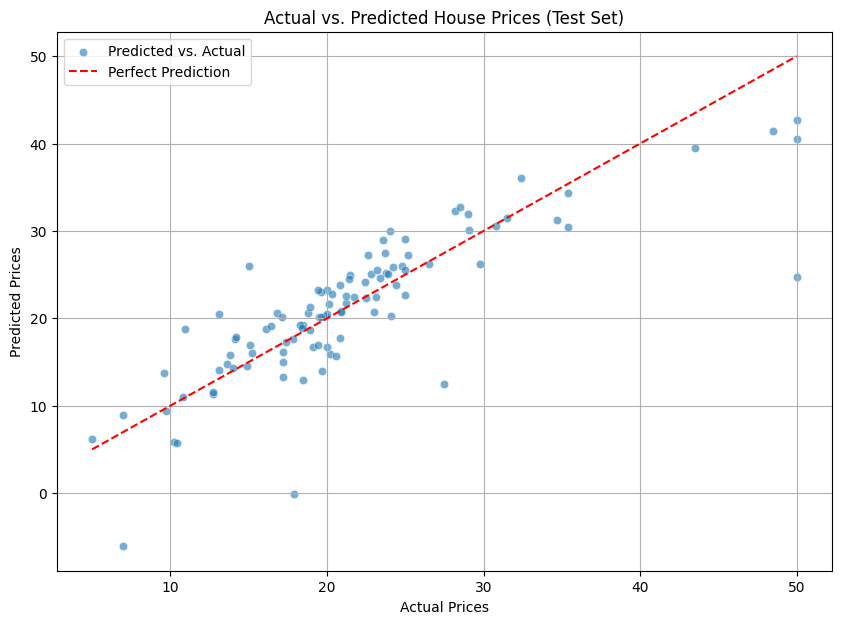

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, label='Predicted vs. Actual')

# Add a line for perfect predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')

plt.title('Actual vs. Predicted House Prices (Test Set)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()


Summarize the findings from the regression analysis, including the model's performance metrics, interpretation of coefficients, and any insights gained from the visualization.
